# Import libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


# Read Data

In [197]:
# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# boat - Lifeboat (if survived)
# body - Body number (if did not survive and body was recovered)
titanic_Data = pd.read_csv(r'C:\Users\ravip\Documents\Data-Science\Machine Learning\Supervised Learning\Classification\Data\Titanic Dataset.csv')

In [198]:
titanic_Data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Data Health check

In [199]:
titanic_Data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [200]:
titanic_Data[titanic_Data['sibsp']>4]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
825,3,0,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
826,3,0,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
827,3,0,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
828,3,0,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
829,3,0,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
830,3,0,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN


In [201]:
titanic_Data[titanic_Data['parch']>2]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
115,1,0,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
252,1,0,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,NaN,NaN,"Haverford, PA / Cooperstown, NY"
253,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
342,2,1,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.0000,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI"
449,2,1,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH"
550,2,1,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S,4,NaN,"Cornwall / Akron, OH"
629,3,0,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN"
632,3,0,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN"
644,3,0,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S,NaN,142.0,"Sweden Worcester, MA"


In [202]:
#Age has lot of NA's
#Data looks firn except age
titanic_Data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# EDA

In [203]:
titanic_Data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

# categorical columns

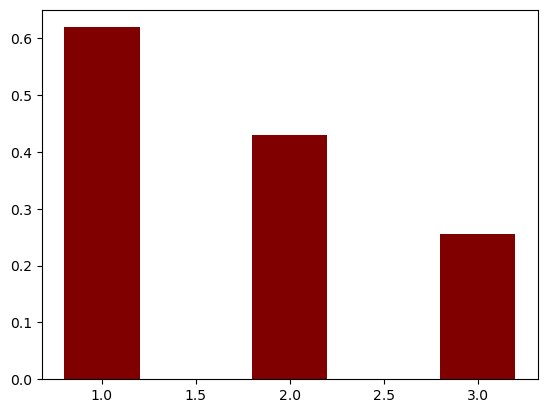

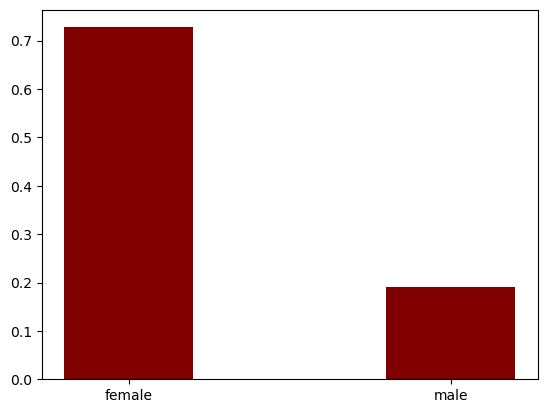

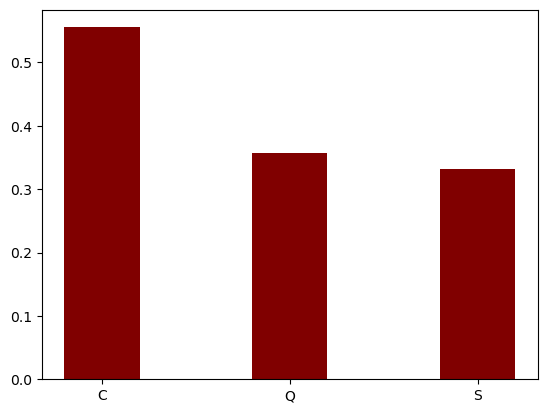

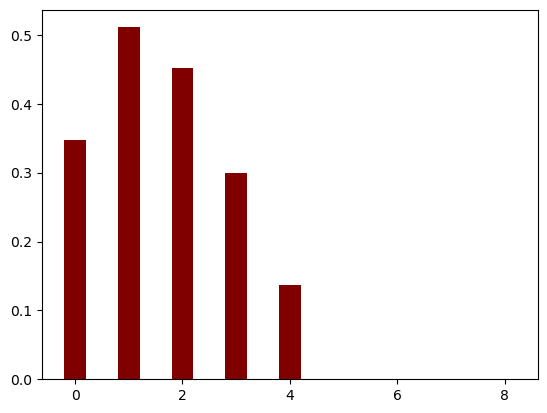

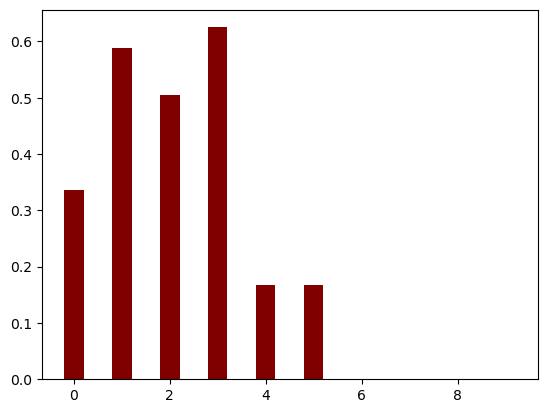

In [204]:
# visualizing how the survival rate wrt pclass, sex
for col in ['pclass', 'sex', 'embarked', 'sibsp', 'parch']:
    df = titanic_Data.pivot_table(index=col, values='survived', aggfunc=['count', 'sum'])
    df.columns = df.columns.get_level_values(0)+" "+df.columns.get_level_values(1)
    df['survival rate'] = df['sum survived']/df['count survived']
    df = df.reset_index()
    col_levels = list(df[col].values)
    survival_rate = list(df['survival rate'].values)
    plt.bar(col_levels, survival_rate, color ='maroon', 
            width = 0.4)
    plt.show()

# contineous columns

In [205]:
print(titanic_Data['fare'].min(), titanic_Data['fare'].max())

0.0 512.3292


In [208]:
titanic_Data['Fare_bin'] = pd.cut(titanic_Data['fare'], bins=5, labels=["0-100", "100-200", "200-300", "300-400", ">400"])
titanic_Data['Age_bin'] = pd.cut(titanic_Data['age'], bins=8, labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])

  Fare_bin  count survived  sum survived  survival rate
0    0-100             811           151       0.186190
1  100-200              17             7       0.411765
2  200-300              12             1       0.083333
3  300-400               0             0            NaN
4     >400               2             2       1.000000


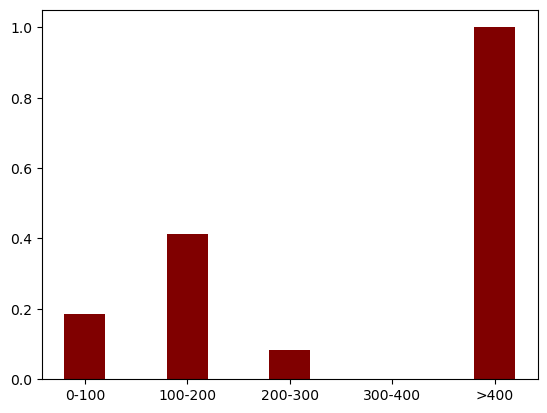

  Age_bin  count survived  sum survived  survival rate
0    0-10              45            25       0.555556
1   10-20              94            14       0.148936
2   20-30             235            43       0.182979
3   30-40             135            28       0.207407
4   40-50              86            16       0.186047
5   50-60              37             7       0.189189
6   60-70              21             1       0.047619
7   70-80               5             1       0.200000


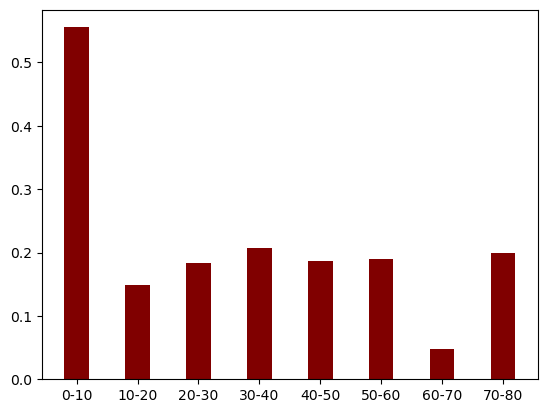

  Fare_bin  count survived  sum survived  survival rate
0    0-100             811           151       0.186190
1  100-200              17             7       0.411765
2  200-300              12             1       0.083333
3  300-400               0             0            NaN
4     >400               2             2       1.000000


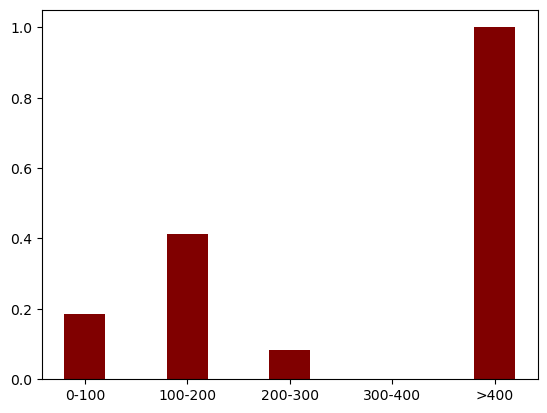

  Age_bin  count survived  sum survived  survival rate
0    0-10              45            25       0.555556
1   10-20              94            14       0.148936
2   20-30             235            43       0.182979
3   30-40             135            28       0.207407
4   40-50              86            16       0.186047
5   50-60              37             7       0.189189
6   60-70              21             1       0.047619
7   70-80               5             1       0.200000


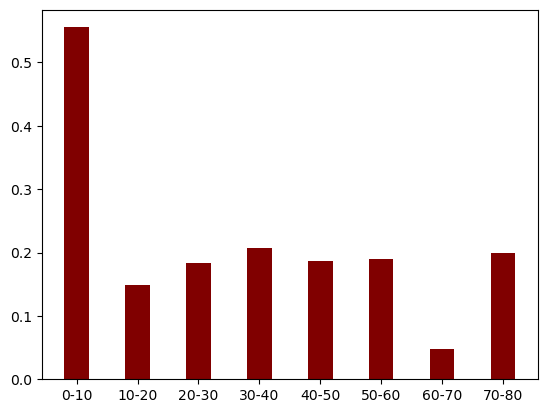

In [209]:
# visualizing how the survival rate wrt pclass, sex
for sex in ['male', 'female']:
    titanic_Data_ = titanic_Data[titanic_Data['sex']=='male']
    for col in ['Fare_bin', 'Age_bin']:
        df = titanic_Data_.pivot_table(index=col, values='survived', aggfunc=['count', 'sum'])
        df.columns = df.columns.get_level_values(0)+" "+df.columns.get_level_values(1)
        df['survival rate'] = df['sum survived']/df['count survived']
        df = df.reset_index()
        print(df)
        col_levels = list(df[col].values)
        survival_rate = list(df['survival rate'].values)
        plt.bar(col_levels, survival_rate, color ='maroon', 
                width = 0.4)
        plt.show()

# implemenation

In [210]:
model_data = titanic_Data[['pclass', 'sex', 'embarked', 'sibsp', 'parch','Age_bin', 'Fare_bin', 'survived']]
cat_cols = ['pclass', 'sex', 'embarked', 'sibsp', 'parch','Age_bin', 'Fare_bin']
for col in cat_cols:
    model_data = pd.concat([model_data, pd.get_dummies(model_data[col], drop_first=True, prefix=col)], axis=1)
    model_data.drop(columns=[col], inplace=True)
model_data

,survived,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,Age_bin_20-30,Age_bin_30-40,Age_bin_40-50,Age_bin_50-60,Age_bin_60-70,Age_bin_70-80,Fare_bin_100-200,Fare_bin_200-300,Fare_bin_300-400,Fare_bin_>400
0,1,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1,False,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,False,False,True,False,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,0,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1305,0,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1306,0,False,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1307,0,False,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [211]:
model_data.columns

Index(['survived', 'pclass_2', 'pclass_3', 'sex_male', 'embarked_Q',
       'embarked_S', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4', 'sibsp_5',
       'sibsp_8', 'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5',
       'parch_6', 'parch_9', 'Age_bin_10-20', 'Age_bin_20-30', 'Age_bin_30-40',
       'Age_bin_40-50', 'Age_bin_50-60', 'Age_bin_60-70', 'Age_bin_70-80',
       'Fare_bin_100-200', 'Fare_bin_200-300', 'Fare_bin_300-400',
       'Fare_bin_>400'],
      dtype='object')

In [212]:
# model_data = titanic_Data[['pclass', 'sex', 'embarked', 'sibsp', 'parch','Age_bin', 'Fare_bin', 'survived']]
X = model_data[['pclass_2', 'pclass_3', 'sex_male', 'embarked_Q',
       'embarked_S', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4', 'sibsp_5',
       'sibsp_8', 'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5',
       'parch_6', 'parch_9', 'Age_bin_10-20', 'Age_bin_20-30', 'Age_bin_30-40',
       'Age_bin_40-50', 'Age_bin_50-60', 'Age_bin_60-70', 'Age_bin_70-80',
       'Fare_bin_100-200', 'Fare_bin_200-300', 'Fare_bin_300-400',
       'Fare_bin_>400']]
y = model_data[['survived']]

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
LR=LogisticRegression()
LR.fit(X_train, y_train)

C:\Users\ravip\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Model evalution

In [229]:
predictions = LR.predict(X_test)
print(accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7989821882951654
[[204  32]
 [ 47 110]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       236
           1       0.77      0.70      0.74       157

    accuracy                           0.80       393
   macro avg       0.79      0.78      0.79       393
weighted avg       0.80      0.80      0.80       393



In [216]:
print(confusion_matrix(y_test, predictions))

[[204  32]
 [ 47 110]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       236
           1       0.77      0.70      0.74       157

    accuracy                           0.80       393
   macro avg       0.79      0.78      0.79       393
weighted avg       0.80      0.80      0.80       393



# AUC curve

In [218]:
probas = LR.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])

In [219]:
roc_auc_score(y_test, predictions)

0.7825218611680881

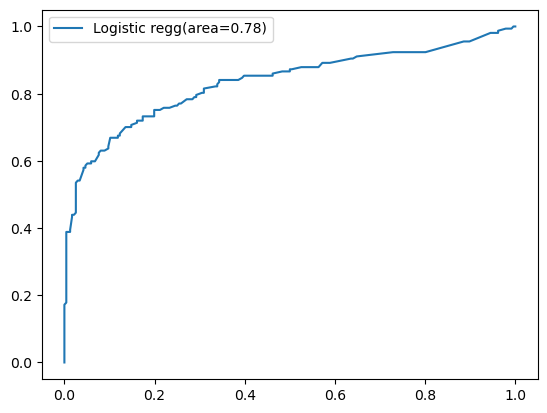

In [221]:
plt.plot(fpr, tpr, label='Logistic regg(area=%0.2f)' %roc_auc_score(y_test, predictions))
plt.legend()
plt.show()

In [224]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]

In [233]:
new_predictions = np.where(LR.predict_proba(X_test)[:,1]>optimal_threshold,1,0)

In [234]:
print(accuracy_score(new_predictions, y_test))
print(confusion_matrix(y_test, new_predictions))
print(classification_report(y_test, new_predictions))

0.7989821882951654
[[213  23]
 [ 56 101]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       236
           1       0.81      0.64      0.72       157

    accuracy                           0.80       393
   macro avg       0.80      0.77      0.78       393
weighted avg       0.80      0.80      0.79       393



In [235]:
print(accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7989821882951654
[[204  32]
 [ 47 110]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       236
           1       0.77      0.70      0.74       157

    accuracy                           0.80       393
   macro avg       0.79      0.78      0.79       393
weighted avg       0.80      0.80      0.80       393

